In [1]:
import json

In [2]:
with open('../resources/templates.json', 'r') as f:
    d = json.load(f)

In [3]:
templates = {item['id']: item for item in d}

In [4]:
templates

{'aag': {'id': 'aag',
  'name': 'Ancient Aliens Guy',
  'lines': 2,
  'overlays': 0,
  'styles': [],
  'blank': 'https://api.memegen.link/images/aag.jpg',
  'example': {'text': ['', 'aliens'],
   'url': 'https://api.memegen.link/images/aag/_/aliens.jpg'},
  'source': 'http://knowyourmeme.com/memes/ancient-aliens',
  'keywords': ['History Channel'],
  '_self': 'https://api.memegen.link/templates/aag'},
 'ackbar': {'id': 'ackbar',
  'name': "It's A Trap!",
  'lines': 2,
  'overlays': 0,
  'styles': [],
  'blank': 'https://api.memegen.link/images/ackbar.jpg',
  'example': {'text': ['', "it's a trap!"],
   'url': "https://api.memegen.link/images/ackbar/_/it's_a_trap!.jpg"},
  'source': 'http://knowyourmeme.com/memes/its-a-trap',
  'keywords': ['Star Wards', 'Admiral Ackbar'],
  '_self': 'https://api.memegen.link/templates/ackbar'},
 'afraid': {'id': 'afraid',
  'name': 'Afraid to Ask Andy',
  'lines': 2,
  'overlays': 0,
  'styles': [],
  'blank': 'https://api.memegen.link/images/afraid.jp

In [5]:
from icrawler.downloader import ImageDownloader

class DownloadURL(ImageDownloader):
    def __init__(self, *args, **kwargs):
        super(DownloadURL, self).__init__(*args, **kwargs)
        self.urls = []
    
    def download(self, task, default_ext, timeout=5, max_retry=3, overwrite=False, **kwargs):
        """Override download to just collect the URL instead of downloading the file"""
        self.urls.append(task['file_url'])
        return task['file_url']

In [6]:
from icrawler.builtin import GoogleImageCrawler
google_crawler = GoogleImageCrawler(
        # storage={'root_dir': output_dir},
        feeder_threads=1,
        parser_threads=1,
        downloader_threads=1,
        downloader_cls=DownloadURL
    )

filters = dict(
            size="=512x512"
            )

google_crawler.crawl(keyword='ACP Pradhyuman reddit serious face CID', max_num=1, filters=filters)

2025-05-21 13:45:18,296 - INFO - icrawler.crawler - start crawling...
2025-05-21 13:45:18,297 - INFO - icrawler.crawler - starting 1 feeder threads...
2025-05-21 13:45:18,298 - INFO - feeder - thread feeder-001 exit
2025-05-21 13:45:18,298 - INFO - icrawler.crawler - starting 1 parser threads...
2025-05-21 13:45:18,299 - INFO - icrawler.crawler - starting 1 downloader threads...
2025-05-21 13:45:19,536 - INFO - parser - parsing result page https://www.google.com/search?q=ACP+Pradhyuman+reddit+serious+face+CID&ijn=0&start=0&tbs=isz%3Aex%2Ciszw%3A512%2Ciszh%3A512&tbm=isch
2025-05-21 13:45:21,598 - INFO - parser - no more page urls for thread parser-001 to parse
2025-05-21 13:45:21,601 - INFO - parser - thread parser-001 exit
2025-05-21 13:45:24,597 - INFO - downloader - no more download task for thread downloader-001
2025-05-21 13:45:24,599 - INFO - downloader - thread downloader-001 exit
2025-05-21 13:45:25,334 - INFO - icrawler.crawler - Crawling task done!


In [7]:
filtered_urls = [url for url in google_crawler.downloader.urls if "redd" not in url.lower()]
filtered_urls

['https://images.news18.com/ibnlive/uploads/2025/04/BeFunky-collage_-2025-04-4a2fbcf77f7a7e5e833b927d920315fb.jpg',
 'https://wp.scoopwhoop.com/wp-content/uploads/2017/04/58f8780a7c99885a8ebb4d90_7f8acdef-a2fc-4f30-a43a-ffac3c1e2fa4.jpg',
 'https://www.cdn.tellyexpress.com/wp-content/uploads/2025/04/IMG-20250406-WA0000.jpg',
 'https://wp.scoopwhoop.com/wp-content/uploads/2017/04/58f8780a7c99885a8ebb4d90_4049e71a-08b5-4efb-8bf7-3988e9bd93fd.jpg',
 'https://media.tenor.com/BmgPXSEzLokAAAAe/oho-acp-pradyuman.png',
 'https://images.filmibeat.com/webp/fit-in/375x180/img/videos/2025/04/981444710-cid-acp-pradyuman-acp-partha-samthaan.jpg',
 'https://i.ytimg.com/vi/Kv0S7e_LicM/maxresdefault.jpg',
 'https://i.ytimg.com/vi/OMgU5vqGTak/maxresdefault.jpg',
 'https://sm.mashable.com/t/mashable_in/photo/default/3-64_jt8w.720.jpg',
 'https://sm.mashable.com/t/mashable_in/photo/default/cid_sf5r.720.jpg',
 'https://i.ytimg.com/vi/Qgv1isNe_nw/maxresdefault.jpg',
 'https://images.timesnownews.com/thumb/m

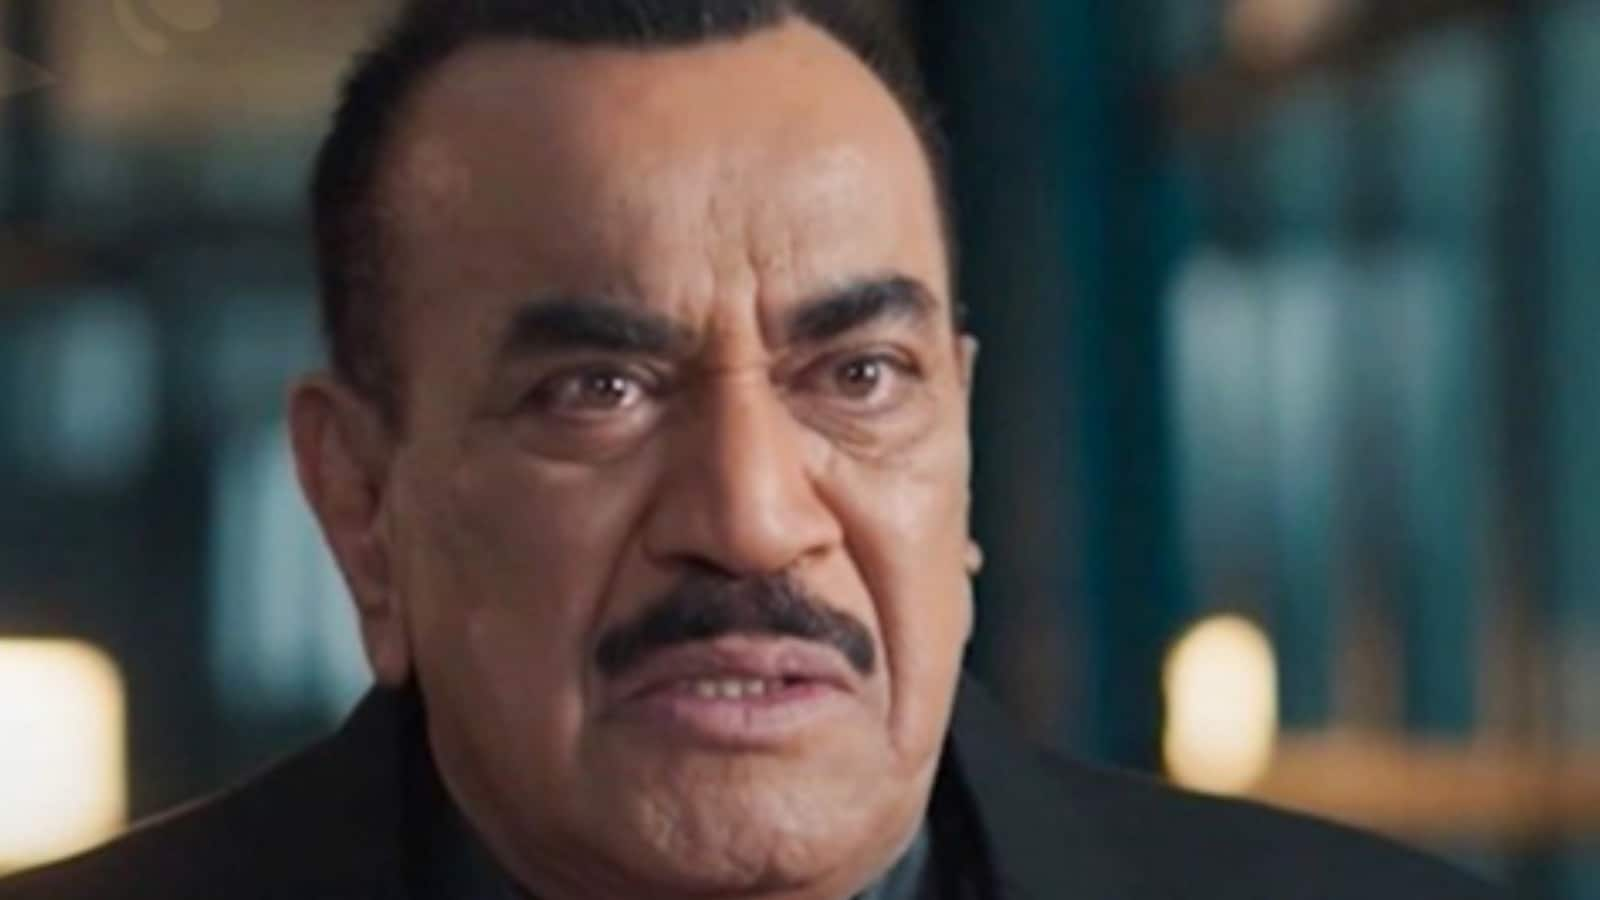

In [8]:
from IPython.display import Image
Image(filtered_urls[0])
# Image(google_crawler.downloader.file_urls[0])